**Exploratory Data Analysis (EDA)** 


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Total_Platforms file Analysis** 

In [2]:
#loading Data
path = 'datasets/total_Platforms.parquet'
total_Platforms = pd.read_parquet(path)

In [3]:
total_Platforms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22998 entries, 0 to 22997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       22998 non-null  object 
 4   cast           22998 non-null  object 
 5   country        22998 non-null  object 
 6   date_added     22998 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   listed_in      22998 non-null  object 
 10  description    22998 non-null  object 
 11  platform       22998 non-null  object 
 12  duration_int   22998 non-null  int32  
 13  duration_type  22998 non-null  object 
 14  score          22998 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(12)
memory usage: 2.7+ MB


In [4]:
#  turn liste_in name into gender
total_Platforms.rename(columns={'listed_in':'gender'}, inplace=True)
total_Platforms.columns

Index(['id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'gender', 'description', 'platform',
       'duration_int', 'duration_type', 'score'],
      dtype='object')

In [5]:
# Verifying nulls
total_Platforms.isnull().sum()

id               0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
gender           0
description      0
platform         0
duration_int     0
duration_type    0
score            0
dtype: int64

In [6]:
# Verifying  duplicades
total_Platforms.duplicated().sum()

0

There's no duplicated neither null because we eliminated all those issues in our ETL and now let's plot using pairplot

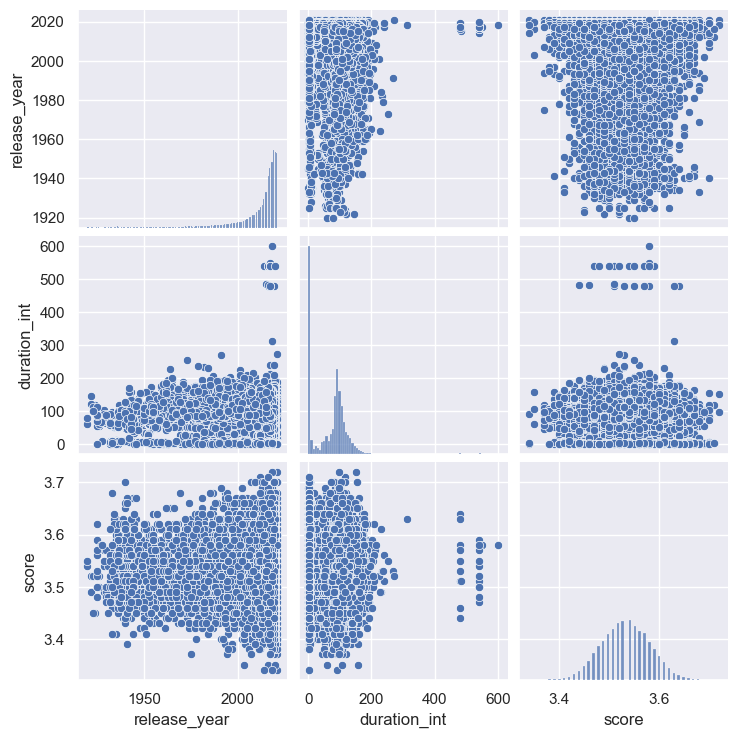

In [7]:
# In order to idetnty if there are some relation wuth the data let's use pairplot function
sns.pairplot(data=total_Platforms)

For our analysis we just will use no cathegorical information which appears  in our pairplot and just taking the id column. Also, I 'll delete duration_int becasue of fact that values do not make the same sense because some data refers to movies in minutes dimension and the other values refers to season dimension, So, I'll work only with id, release_year and score
the are some outliers on duration int column.So, let's just use the information which is important

In [8]:
# creating a new data frame with the most important features
total_Platforms = total_Platforms[['id','release_year','score']]
total_Platforms.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22998 entries, 0 to 22997
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            22998 non-null  object 
 1   release_year  22998 non-null  int64  
 2   score         22998 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 718.7+ KB


In [9]:
#looking through score column's values
total_Platforms.score.describe()

count    22998.000000
mean         3.533449
std          0.048639
min          3.340000
25%          3.500000
50%          3.530000
75%          3.570000
max          3.720000
Name: score, dtype: float64

**Working on rating files**

In [10]:
# Loaging data
df1= pd.read_parquet('datasets/ratings/1.parquet')
df2= pd.read_parquet('datasets/ratings/2.parquet')
df3= pd.read_parquet('datasets/ratings/3.parquet')
df4= pd.read_parquet('datasets/ratings/4.parquet')
df5= pd.read_parquet('datasets/ratings/5.parquet')
df6= pd.read_parquet('datasets/ratings/6.parquet')
df7= pd.read_parquet('datasets/ratings/7.parquet')
df8= pd.read_parquet('datasets/ratings/8.parquet')

In [11]:
# Verifying nulls
print(df1.isnull().sum())
'''
print(df2.isnull().sum())
print(df3.isnull().sum())
print(df4.isnull().sum())
print(df5.isnull().sum())
print(df6.isnull().sum())
print(df7.isnull().sum())
print(df8.isnull().sum())
'''

userId       0
rating       0
timestamp    0
movieId      0
dtype: int64


'\nprint(df2.isnull().sum())\nprint(df3.isnull().sum())\nprint(df4.isnull().sum())\nprint(df5.isnull().sum())\nprint(df6.isnull().sum())\nprint(df7.isnull().sum())\nprint(df8.isnull().sum())\n'

In [12]:
#  joining data by using concat function
data = [df1,df2,df3,df4,df5,df6,df7,df8]
df_scores = pd.concat(data)
df_scores.head()

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [13]:
# checking all data joined
df_scores = df_scores[['userId','rating','movieId']]
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11024289 entries, 0 to 1499999
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   rating   float64
 2   movieId  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 336.4+ MB


In [14]:
df_scores.head()

,userId,rating,movieId
0,1,1.0,as680
1,1,4.5,ns2186
2,1,5.0,hs2381
3,1,5.0,ns3663
4,1,5.0,as9500


***rating score Data Analysis***

In [15]:
# rating films by users
df_score_by_users = df_scores.groupby(['userId']).count()
df_score_by_users.head()

,rating,movieId
userId,,
1,27,27
2,22,22
3,10,10
4,62,62
5,26,26


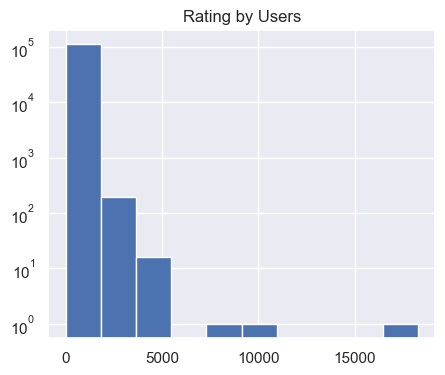

In [16]:
fig = plt.figure(figsize=(5,4))
plt.hist(df_score_by_users.rating, log= True)
plt.title('Rating by Users')
plt.show()

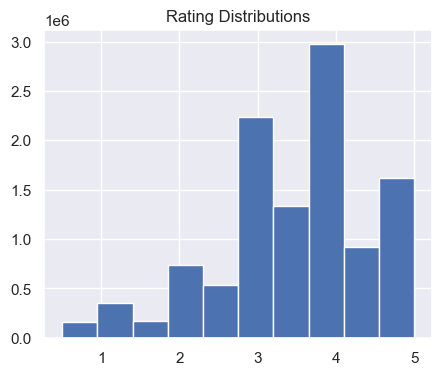

In [17]:
# Checking rating distributions out
fig = plt.figure(figsize=(5,4))
df_scores.rating.hist()
plt.title('Rating Distributions')
plt.show()

**By Grouping by movies, it will be able to identify the film with the best and less rating**.

In [18]:
df_score_by_movies = df_scores.groupby(['movieId']).count()
df_score_by_movies.head()

,userId,rating
movieId,,
as1,502,502
as10,513,513
as100,430,430
as1000,485,485
as1001,469,469


In [19]:
#Computing max and min's index values
idx_max = df_score_by_movies['userId'].idxmax()
idx_min = df_score_by_movies['userId'].idxmin()

In [20]:
#In order to have the name let's load totalPlatforms file
df_title = pd.read_parquet('datasets/total_Platforms.parquet', 
                       columns=['id','title']).set_index('id')
#df_title = df_title[['id','title']]
df_title.head()

,title
id,
as1,the grand seduction
as2,take care good night
as3,secrets of deception
as4,pink: staying true
as5,monster maker


In [21]:
print('best rating: ',df_title.loc[idx_max].title)
print('less rating: ',df_title.loc[idx_min].title)

best rating:  from other worlds
less rating:  mitzi (nbc 1968)


Now let's see which movies are the most viewed

In [22]:
#grouping by movieId and count
df1_by_movies = df_scores.groupby(['movieId']).count()
#let's sort values From biggest to smallest
df1_by_movies.sort_values('userId', ascending = False, inplace = True)
#Creating a new column called Viewed
df1_by_movies['viewed'] = df1_by_movies['userId']
#droping userId and Rating Columns
df1_by_movies.drop(columns = ['userId','rating'], inplace = True)
df1_by_movies.head()

,viewed
movieId,
as4197,576
as9065,560
ns7279,558
as848,558
hs2360,556


In [23]:
#let's add the name of the movie for each movie id
df1_by_movies['title'] = df_title.loc[df1_by_movies.index].title
df1_by_movies.head()

,viewed,title
movieId,,
as4197,576,from other worlds
as9065,560,the organization
ns7279,558,"leapfrog: sing-along, read-along"
as848,558,superbook
hs2360,556,dietland


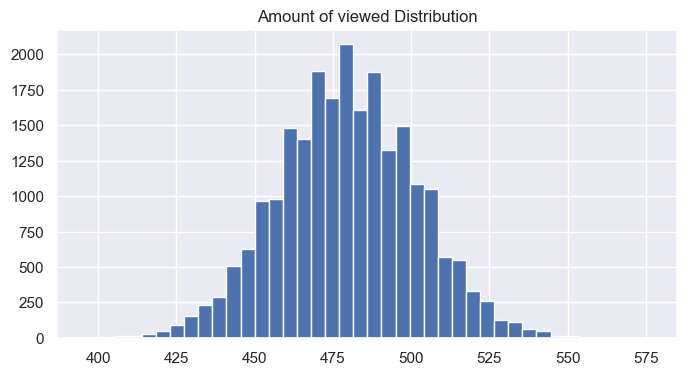

In [24]:
#plot the amount of viewed Distribution
plt.figure(figsize = (8,4))
df1_by_movies.viewed[df1_by_movies.viewed<1000].hist(log = False, bins = 40)
plt.title('Amount of viewed Distribution')
plt.show()


In this case, we can see that the amount of viewed distribution is symetric. So, It is not necessary to create a threshold filter and we will work with all the data

Finally, I'll save in a csv file

In [25]:
#df_scores.to_csv('datasets/df_scores.csv',index=False)